# MACHINE LEARNING PROJECT - HEART DISEASE

### STEP 0. BUSINESS UNDERSTANDING

This notebook provides an example of a machine learning model to predict if a person would have a heart disease or not based on the given features. The dataset used in this notebook is the heart disease dataset from FEDESORIANO user of Kaggle: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction. The dataset contains 12 columns and 918 rows. The columns are as follows:


#### *FEATURES*

- ***Age***: Age of the patient (years)

- ***Sex***: Sex of the patient (M: Male, F: Female)
- ***ChestPainType***: Chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
- ***RestingBP***: Resting blood pressure (mm Hg)
- ***Cholesterol***: Serum cholesterol (mm/dl)
- ***FastingBS***: Fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)
- ***RestingECG***: Resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)
- ***MaxHR***: Maximum heart rate achieved (Numeric value between 60 and 202)
- ***ExerciseAngina***:  Exercise-induced angina (Y: Yes, N: No)
- ***Oldpeak***: Oldpeak = ST (Numeric value measured in depression)
- ***ST_Slope***: The slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)

#### *TARGET*

- ***HeartDisease***: Output class (1: heart disease, 0: Normal)

### STEP 1. IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time
import sys

sys.path.append("../utils")
import Funciones as fn

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

import pickle


### STEP 2. LOAD DATA

In [2]:
df = pd.read_csv("../data_sample/heart.csv")

### STEP 3. VISUALITATION OF DATA AND VARIABLE UNDERSTANDING

First of all, we take a look of the data

In [3]:
pd.set_option("display.max_columns", None) # Así vemos todas las columnas
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


We make an small visualitation of the data: type, missing values, unique values and cardinality

In [4]:
fn.describe_df(df).T

,DATE_TYPE,MISSINGS(%),UNIQUE_VALUES,CARDIN(%)
COL_N,,,,
Age,int64,0.0,50,5.45
Sex,object,0.0,2,0.22
ChestPainType,object,0.0,4,0.44
RestingBP,int64,0.0,67,7.3
Cholesterol,int64,0.0,222,24.18
FastingBS,int64,0.0,2,0.22
RestingECG,object,0.0,3,0.33
MaxHR,int64,0.0,119,12.96
ExerciseAngina,object,0.0,2,0.22


*We have not any missing values in the dataset*

We check the current type of each variable and compare them with the type suggested from the function

In [5]:
fn.tipifica_variables(df)

,nombre_variable,dtype,tipo_sugerido
0,Age,int64,Numerica discreta
1,Sex,object,Binaria
2,ChestPainType,object,Categorica
3,RestingBP,int64,Numerica discreta
4,Cholesterol,int64,Numerica discreta
5,FastingBS,int64,Binaria
6,RestingECG,object,Categorica
7,MaxHR,int64,Numerica discreta
8,ExerciseAngina,object,Binaria
9,Oldpeak,float64,Numerica discreta


#### STEP 3.1. Identifying the target variable

In [6]:
target = "HeartDisease"

### STEP 4. TRAIN-TEST SPLIT

In [7]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state= 42)

In [8]:
print(train_set.shape)
print(test_set.shape)

(734, 12)
(184, 12)


We make the pair variables X,y for train and test

In [9]:
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]

X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]

### STEP 5. FEATURE ANALYSIS

STEP 5.1. Target analysis

In [10]:
train_set[target].value_counts(True)

HeartDisease
1    0.546322
0    0.453678
Name: proportion, dtype: float64

<Axes: xlabel='HeartDisease'>

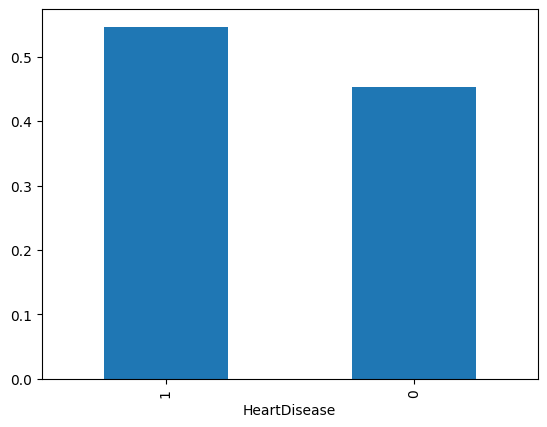

In [11]:
train_set[target].value_counts(True).plot(kind='bar')

*It seems that the target variable is quite balanced, so we can continue with the analysis. If we would like more balanced data we could use some techniques used for that*

#### STEP 5.2. Analysis of the other features

We divide our features into numerical and categorical in on a first step

In [12]:
# Categorical features

cat_features = X_train.select_dtypes(include='object').columns.tolist()
cat_features

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [13]:
# Numerical features

num_features = X_train.select_dtypes(include='number').columns.tolist()
num_features

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

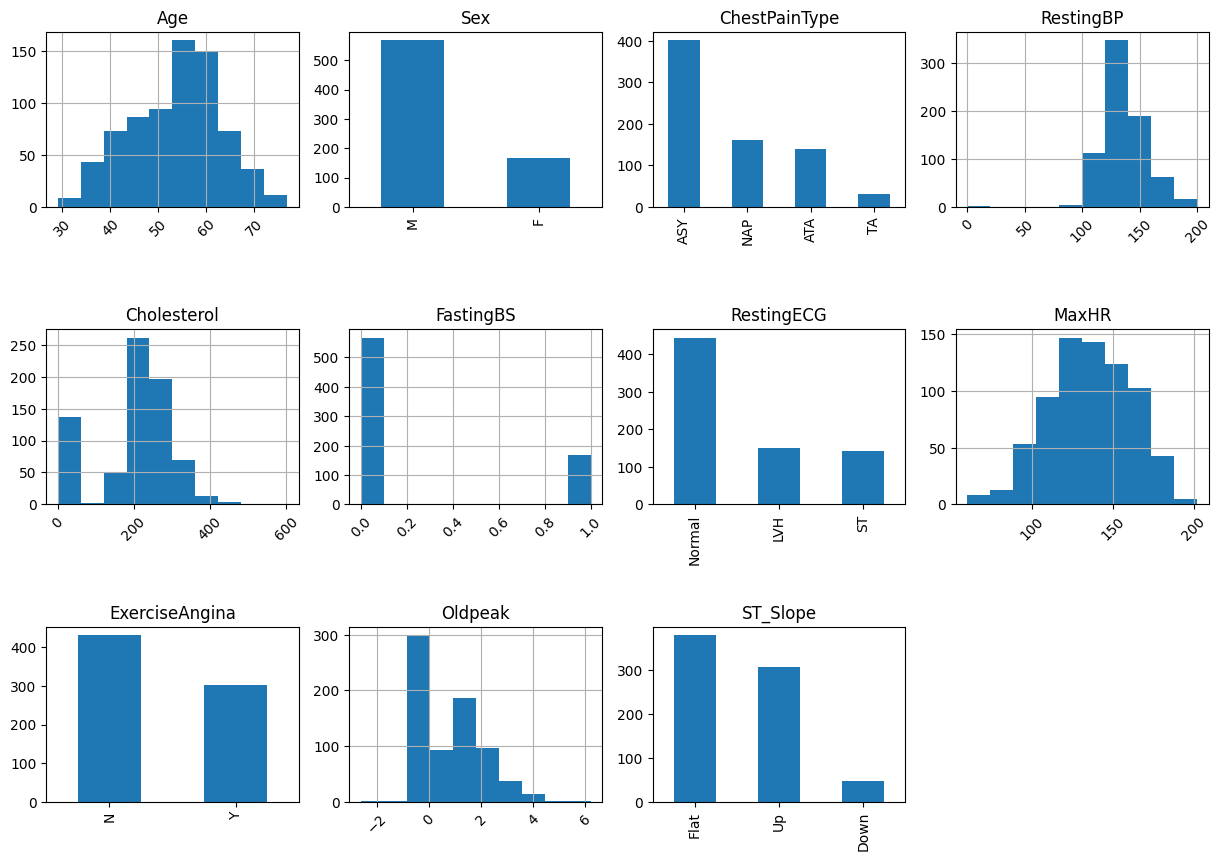

In [14]:
# Visualitation with bar diagram for categorical variables and histograms for numerical variables

fig = plt.figure(figsize=(15, 10))
cols = 4
rows = int(np.ceil(float(X_train.shape[1]) / cols))

for i, column in enumerate(X_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)

    if X_train.dtypes[column] == object:
        X_train[column].value_counts().plot(kind="bar", axes=ax)
        plt.xlabel("")
        # plt.xticks(rotation=45)
    else:
        X_train[column].hist(axes=ax)
        plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [15]:
print(cat_features)
print(num_features)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']


We can see some interesting things:

- Sex, FastingBS, ExerciseAngina are binary variables. We need to make a mapping to convert Sex and ExerciseAngina to 0 and 1
- RestingBP and Cholesterol have 0 values, which is not possible. This is due to missing or unknown values. We will impute them later
- FastingBS variable was initially considered as a numerical variable, but it is actually a binary/categorical variable. We will convert it to a binary variable

### STEP 6. PIPELINE CREATION

#### STEP 6.1. Impute 0 values

In [16]:
# (X_train["RestingBP"] == 0).value_counts()

In [17]:
# (X_train["Cholesterol"] == 0).value_counts()

In [18]:
# X_train_colesterol_0 = X_train[X_train["Cholesterol"] == 0]

In [19]:
# X_train_colesterol_0

#### STEP 6.2. Categorical transformation

In [20]:
X_train["ExerciseAngina"].value_counts()

ExerciseAngina
N    431
Y    303
Name: count, dtype: int64

In [21]:
# We divide categorical variables in binary and other categorical because their preprocessing will be different

bin_features = ['Sex', 'FastingBS', 'ExerciseAngina']
cat_features = ['ChestPainType', 'RestingECG', 'ST_Slope']

In [22]:
# Pipeline for preprocessing of binary variables
# This function let variables transform into boolean (not needed for variable FastinBS because it is already boolean)

def cat_binary(df):
    df["Sex"] = df["Sex"] == "M"
    df["ExerciseAngina"] = df["ExerciseAngina"] == "Y"
    return df

In [23]:
encod_bin = FunctionTransformer(cat_binary, feature_names_out = 'one-to-one')

bin_pipeline = Pipeline(
    [("Binary", encod_bin)])

# Pipeline for preprocessing of categorical variables

# cat_pipeline = Pipeline(
#     [("OHEncoder", OneHotEncoder())])

cat_pipeline = Pipeline(
    [("LE", OrdinalEncoder())])

#### STEP 6.2. Numerical transformation

In [24]:
num_pipeline = Pipeline(
    [('Standar_Scaler',StandardScaler())])

#### STEP 6.3. Complete preprocessing pipeline

In [25]:
preprocessor = ColumnTransformer(transformers=[
    ("bin", bin_pipeline, bin_features),
    ("cat", cat_pipeline, cat_features),
    ("num", num_pipeline, num_features)
    ])

#### STEP 6.4. Checking the features importance

We create a pipeline with the preprocessing and the RandomForest model for getting the features importance

In [26]:
rf_pipeline = Pipeline(
    [("Preprocesado", preprocessor),
     ("Modelo", RandomForestClassifier())
    ])

In [27]:
rf_pipeline.fit(X_train, y_train)
modelo = rf_pipeline.named_steps['Modelo'] # We extract the model from the pipeline
importancia = modelo.feature_importances_ # And the importance of the features

In [28]:
# We make pairs beetween feature and importante

importancia_features = sorted(zip(X_train.columns, importancia), key=lambda x: x[1], reverse=True) 

print("IMPORTANCIA DE LAS FEATURES")
for feature, imp in importancia_features:
    print(f"{feature}: {imp:.4f}")

IMPORTANCIA DE LAS FEATURES
FastingBS: 0.2134
ST_Slope: 0.1107
RestingBP: 0.1073
ExerciseAngina: 0.1063
ChestPainType: 0.1010
RestingECG: 0.0867
MaxHR: 0.0661
Age: 0.0338
Cholesterol: 0.0248
Sex: 0.0165
Oldpeak: 0.0151


### STEP 7. PIPELINE FOR MODELING

#### STEP 7.1. Define the metric and the folds for cross-validation

As target is quite balanced, we will use accuracy as metric

In [29]:
metric = "accuracy"
cv = 5

#### STEP 7.2. Selection of features

In [30]:
# Selection the most important features with RandomForest

feature_selector = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42)
    )

#### STEP 7.3. Pipeline for models

In [31]:
cat_pipeline = Pipeline(
    [("OHEncoder", OneHotEncoder())])

In [32]:
preprocessor = ColumnTransformer(transformers=[
    ("bin", bin_pipeline, bin_features),
    ("cat", cat_pipeline, cat_features),
    ("num", num_pipeline, num_features)
    ])

In [33]:
# Pipeline with preprocessing, selection of features and model

logistic_pipeline = Pipeline(
    [("Preprocesado", preprocessor),
     ("Selección_features", feature_selector),
     ("Modelo", LogisticRegression())
    ])

random_pipeline = Pipeline(
    [("Preprocesado", preprocessor),
     ("Selección_features", feature_selector),
     ("Modelo", RandomForestClassifier())
    ])

xgb_pipeline = Pipeline(
    [("Preprocesado", preprocessor),
     ("Selección_features", feature_selector),
     ("Modelo", XGBClassifier())
    ])

dl_pipeline = Pipeline([("preprocesado", preprocessor),
                   ("modelo", MLPClassifier(max_iter= 5000, random_state= 42, batch_size= 32)) 
                  ])

In [34]:
# Example of use of pipeline

xgb_pipeline

Pipeline(steps=[('Preprocesado',
                 ColumnTransformer(transformers=[('bin',
                                                  Pipeline(steps=[('Binary',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function cat_binary at 0x00000151DB9CA980>))]),
                                                  ['Sex', 'FastingBS',
                                                   'ExerciseAngina']),
                                                 ('cat',
                                                  Pipeline(steps=[('OHEncoder',
                                                                   OneHotEncoder())]),
                                                  ['ChestPainType',
                                                   'RestingECG', 'ST_Slope']),
                                                 ('num',
                                                  Pipeline(...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

#### STEP 7.4. Cross-validation with models without adjusting of hyperparameters

In [35]:
# Iterating around the models

for name, pipe in zip(["Logistic", "RandomF", "XGB", "MLP"],[logistic_pipeline, random_pipeline, xgb_pipeline, dl_pipeline]):
    start_time = time.time()
    resultado = cross_val_score(pipe, X_train, y_train, cv=cv, scoring=metric)
    end_time = time.time()
    elapsed_time = end_time - start_time 

    print(f"{name}: {np.mean(resultado):.4f}")
    print(f"Scores: {resultado}")
    print(f"Tiempo de CV: {elapsed_time:.2f} segundos\n")

Logistic: 0.8501
Scores: [0.8707483  0.87755102 0.82312925 0.82993197 0.84931507]
Tiempo de CV: 1.77 segundos

RandomF: 0.8406
Scores: [0.85714286 0.8707483  0.82993197 0.80272109 0.84246575]
Tiempo de CV: 2.53 segundos

XGB: 0.8311
Scores: [0.85034014 0.85714286 0.82993197 0.78911565 0.82876712]
Tiempo de CV: 1.61 segundos

MLP: 0.8188
Scores: [0.83673469 0.82993197 0.85034014 0.7755102  0.80136986]
Tiempo de CV: 25.67 segundos



*The best model is Logistic Regression with an accuracy of 85,01%. Now we are going to adjust hyperparameters for trying to get a better model or a better accuracy. MLP has the worst accuracy and the time expended is much more in comparation with the other models, so we won't optimize it*

In [36]:
# ---------IGUAL LUEGO LO QUITAMOS---------

preprocessing_pipeline = preprocessor 
X_train_transformed = preprocessing_pipeline.fit_transform(X_train)
feature_names = preprocessing_pipeline.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_transformed, columns=feature_names)
X_train_df

,bin__Sex,bin__FastingBS,bin__ExerciseAngina,cat__ChestPainType_ASY,cat__ChestPainType_ATA,cat__ChestPainType_NAP,cat__ChestPainType_TA,cat__RestingECG_LVH,cat__RestingECG_Normal,cat__RestingECG_ST,cat__ST_Slope_Down,cat__ST_Slope_Flat,cat__ST_Slope_Up,num__Age,num__RestingBP,num__Cholesterol,num__FastingBS,num__MaxHR,num__Oldpeak
0,True,1,False,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.245067,-0.708985,0.372803,1.842609,2.284353,-0.097061
1,True,0,False,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.886236,-0.166285,0.086146,-0.542709,1.652241,-0.836286
2,True,1,True,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.250993,0.919115,0.123134,1.842609,-0.441628,0.087745
3,False,0,False,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.779375,-0.166285,0.10464,-0.542709,0.229991,-0.836286
4,True,1,False,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.283314,-0.708985,-1.846478,1.842609,-1.271274,-0.836286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,False,0,False,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.603898,-0.708985,0.502261,-0.542709,-1.034232,-0.836286
730,True,0,False,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.924483,-0.708985,0.234098,-0.542709,0.150977,-0.836286
731,True,0,True,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.678439,-0.166285,0.493014,-0.542709,0.309005,0.457358
732,True,0,True,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.678439,1.027656,-1.846478,-0.542709,-0.718176,-0.836286


In [37]:
# ---------IGUAL LUEGO LO QUITAMOS---------

X_train_df.describe().T

,count,unique,top,freq
bin__Sex,734,2,True,568
bin__FastingBS,734,2,0,567
bin__ExerciseAngina,734,2,False,431
cat__ChestPainType_ASY,734.0,2.0,1.0,401.0
cat__ChestPainType_ATA,734.0,2.0,0.0,595.0
cat__ChestPainType_NAP,734.0,2.0,0.0,572.0
cat__ChestPainType_TA,734.0,2.0,0.0,702.0
cat__RestingECG_LVH,734.0,2.0,0.0,585.0
cat__RestingECG_Normal,734.0,2.0,1.0,444.0
cat__RestingECG_ST,734.0,2.0,0.0,593.0


#### STEP 7.5. Adjust hyperparameters

In [38]:
pipe_reg_log_param = {
    "Modelo__penalty": ["l2"], 
    "Modelo__C": np.logspace(0, 4, 10)
    }

pipe_rand_forest_param = {
    'Modelo__n_estimators': [10, 100, 200, 400],
    'Modelo__max_depth': [1,2,4,8],
    'Modelo__max_features': [1, 2, 3]
    }

pipe_xgb_param = {
    'Modelo__n_estimators': [10, 100, 200, 400],
    'Modelo__max_depth': [1,2,4,8],
    'Modelo__learning_rate': [0.1,0.2,0.5,1.0],
    }

gs_reg_log = GridSearchCV(logistic_pipeline,
                          pipe_reg_log_param,
                          cv=cv,
                          scoring=metric,
                          verbose=1,
                          n_jobs=-1)

gs_rand_forest = GridSearchCV(random_pipeline,
                              pipe_rand_forest_param,
                              cv=cv,
                              scoring=metric,
                              verbose=1,
                              n_jobs=-1)

gs_xgb = GridSearchCV(xgb_pipeline,pipe_xgb_param,
                      cv=cv,
                      scoring=metric,
                      verbose=1,
                      n_jobs=-1)

# Dict with pipelines

pipe_grids = {"gs_reg_log":gs_reg_log,
              "gs_rand_forest":gs_rand_forest,
              "gs_xgb":gs_xgb}

In [39]:
# Execut GridSearch for each model

for nombre, grid_search in pipe_grids.items():

    start_time = time.time() 
    grid_search.fit(X_train, y_train)
    end_time = time.time() 
    elapsed_time = end_time - start_time

    print(f"Tiempo de GS para {nombre}: {elapsed_time:.2f} segundos\n")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tiempo de GS para gs_reg_log: 7.26 segundos

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Tiempo de GS para gs_rand_forest: 41.60 segundos

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Tiempo de GS para gs_xgb: 28.16 segundos



In [40]:
# Best GridSearch for each model in a dataframe

best_grids = [(i, j.best_score_) for i, j in pipe_grids.items()]
best_grids = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)
best_grids

,Grid,Best score
1,gs_rand_forest,0.855531
0,gs_reg_log,0.851496
2,gs_xgb,0.848756


### STEP 8. SAVE THE BEST MODEL

In [41]:
# Best model pipeline

best_model = pipe_grids[best_grids.iloc[0,0]]
best_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocesado',
                                        ColumnTransformer(transformers=[('bin',
                                                                         Pipeline(steps=[('Binary',
                                                                                          FunctionTransformer(feature_names_out='one-to-one',
                                                                                                              func=<function cat_binary at 0x00000151DB9CA980>))]),
                                                                         ['Sex',
                                                                          'FastingBS',
                                                                          'ExerciseAngina']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('OHEncoder',
                                                                                          OneHotEncoder())]),
                                                                         ['ChestPainType',
                                                                          'RestingECG',
                                                                          '...
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'RestingBP',
                                                                          'Cholesterol',
                                                                          'FastingBS',
                                                                          'MaxHR',
                                                                          'Oldpeak'])])),
                                       ('Selección_features',
                                        SelectFromModel(estimator=RandomForestClassifier(random_state=42))),
                                       ('Modelo', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'Modelo__max_depth': [1, 2, 4, 8],
                         'Modelo__max_features': [1, 2, 3],
                         'Modelo__n_estimators': [10, 100, 200, 400]},
             scoring='accuracy', verbose=1)

In [42]:
try:
    pickle.dumps(best_model)  
    print("El modelo es compilable ✅")
except Exception as e:
    print(f"Error de compilación ❌: {e}")

El modelo es compilable ✅


In [43]:
# Save el modelo

def find_repo_root():
    current_dir = os.getcwd()
    while current_dir != os.path.dirname(current_dir):  # Stop at the root directory
        if "src" in os.listdir(current_dir):  # Assumes 'src' is in repo root
            return current_dir
        current_dir = os.path.dirname(current_dir)  # Move up one level
    return os.getcwd()  # Default to current dir if nothing found

# Find the current repo root

repo_root = find_repo_root()

# Define the to src/models

folder_path = os.path.join(repo_root, "src", "models")

# Define the path to save the model el path para salvar el modelo

model_path = os.path.join(folder_path, "modelo_pipeline.pkl")

# Save the model

with open(model_path, "wb") as archivo:
    pickle.dump(best_model, archivo)

print(f"Model saved at: {model_path}")

Model saved at: c:\Users\ancar\Online_Env\Repo_DS\ONLINE_DS_THEBRIDGE_Antonio_Carreno_Jimenez\ML_Heart_Failure\src\models\modelo_pipeline.pkl


### STEP 9. EVALUATE THE MODEL TO TEST SET

In [44]:
print(classification_report(y_test, best_model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.80      0.86      0.83        77
           1       0.89      0.85      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



[[66 11]
 [16 91]]


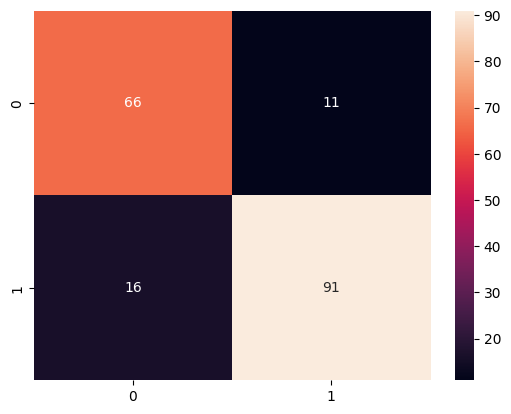

In [45]:
c_matrix = confusion_matrix(y_test, best_model.predict(X_test))
print(c_matrix)
import seaborn as sns
sns.heatmap(c_matrix, annot=True);

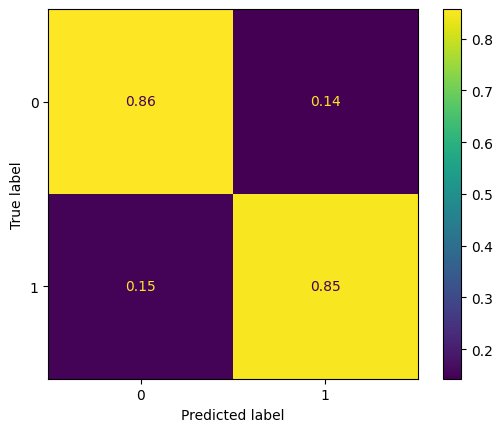

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, best_model.predict(X_test), normalize = "true")